<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>AWS EC2;</li>
  <li>AWS SageMaker;</li>
  <li>AWS Acesso Externo.</li>
</ol>

---

# **Exercícios**

## 1\. AWS SageMaker

Replique as atividades do item 2.3 em sua conta.

2.3. Atividade

Criar um bucket no AWS S3;

*   Fazer o upload de um objeto no bucket do AWS S3;
*   Criar um notebook no AWS SageMaker;
*   Carregar o objeto do bucket do AWS S3 no notebook;
*   Desligar a instância do AWS EC2 do notebook.




**Criar um bucket no AWS S3 e inserindo arquivo:**

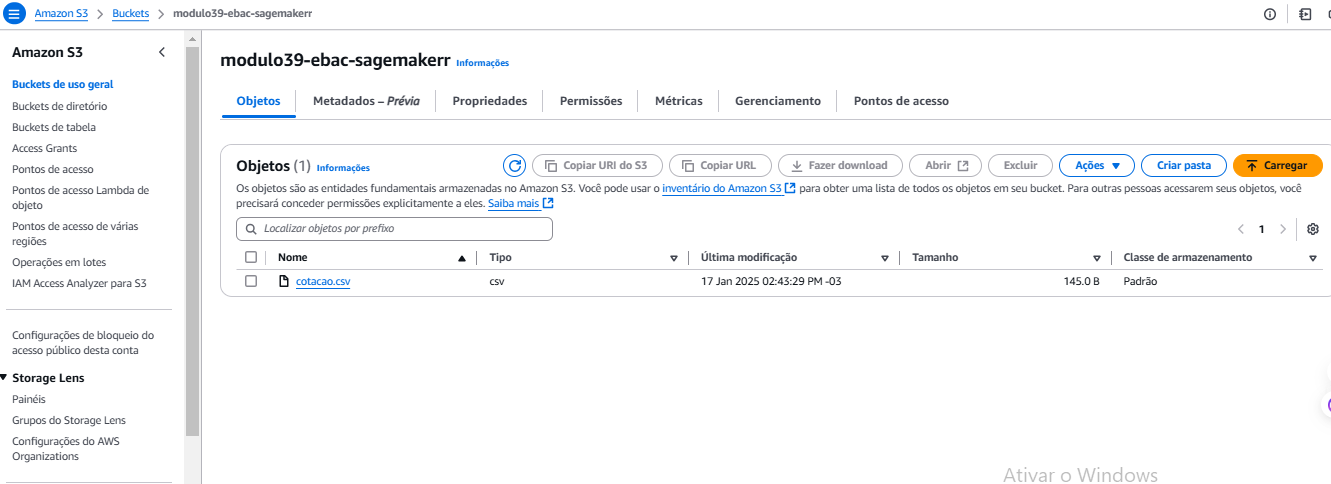

**Criando notebook no sagemaker e confirmando status em Serviço:**





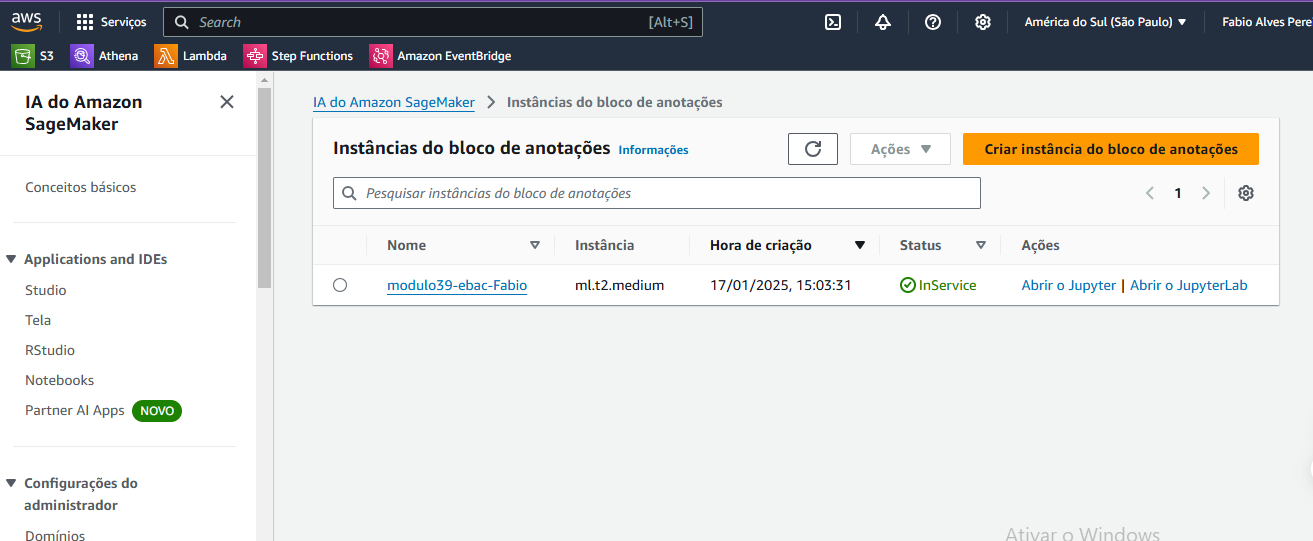

**Carregar o objeto do bucket do AWS S3 no notebook do sagemaker:**

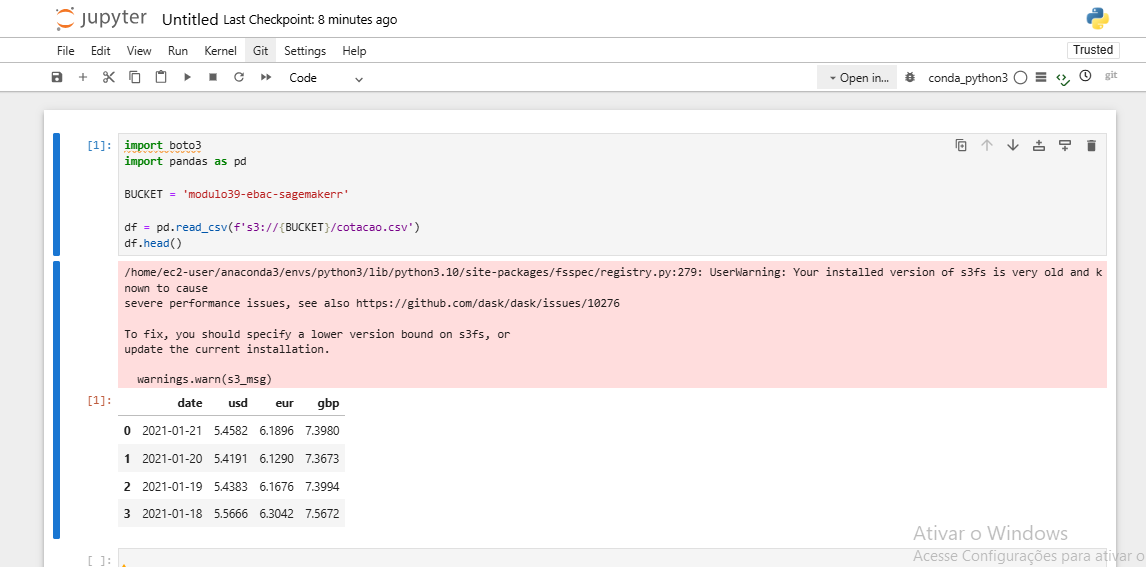

**Desligue a instância do AWS EC2 do notebook:**

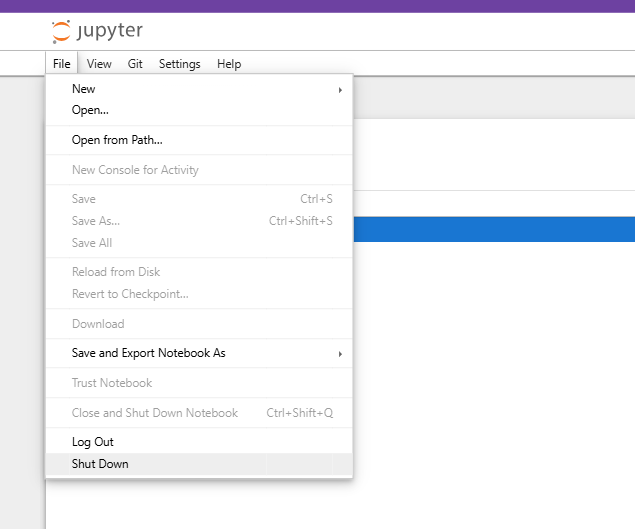

**Clicando em parar e confirmando status stopping:**



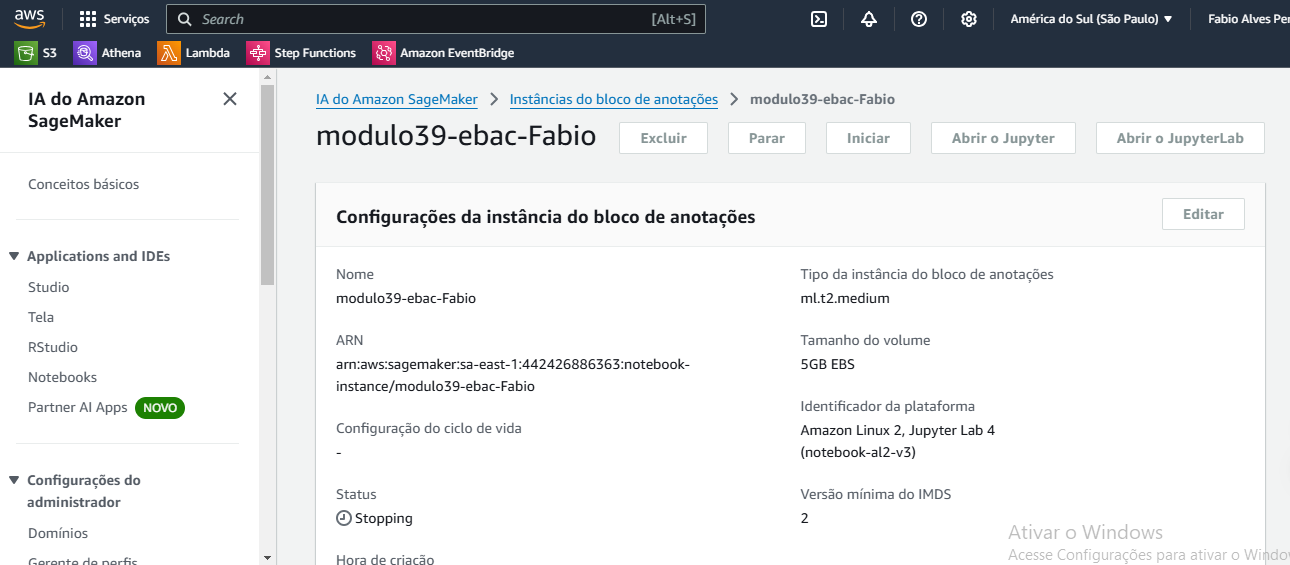

## 2\. AWS Acesso Externo

Replique as atividades do item 3.1 em sua conta.

Para interagir externamente com os serviços da AWS, basta criar um usuário de acesso programático. O usuário é identificado por uma credencial do tipo chave-valor.


 > **Nota**: Antes de executar a atividade tome um cuidado especial com as permissões concedidas ao usuário externo.

1. No AWS [IAM](https://aws.amazon.com/pt/iam/), criar um usuário programático;
2. Adicionar política de leitura em *buckets* do AWS [S3](https://aws.amazon.com/pt/s3/);
3. Salvar a credencial em um arquivo CSV.



**Parte 1:**

**1-No AWS IAM, criar um usuário programático:**







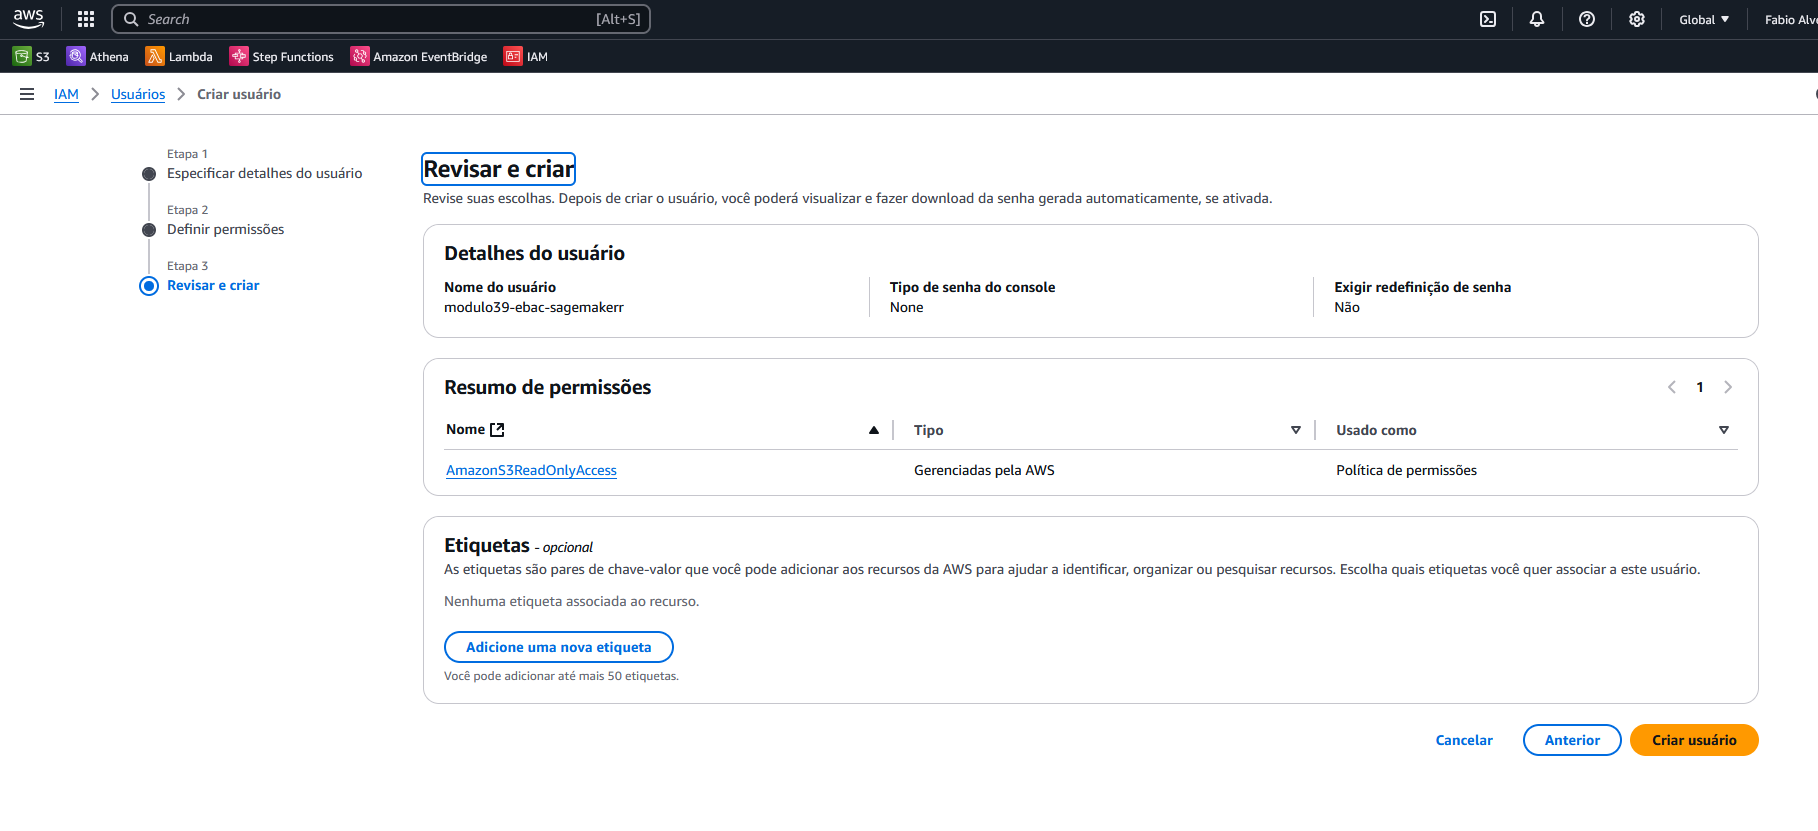

**Chave de acesso Criada com sucesso:**

Nota: Esse é o único momento que temos para salvar as credenciais.

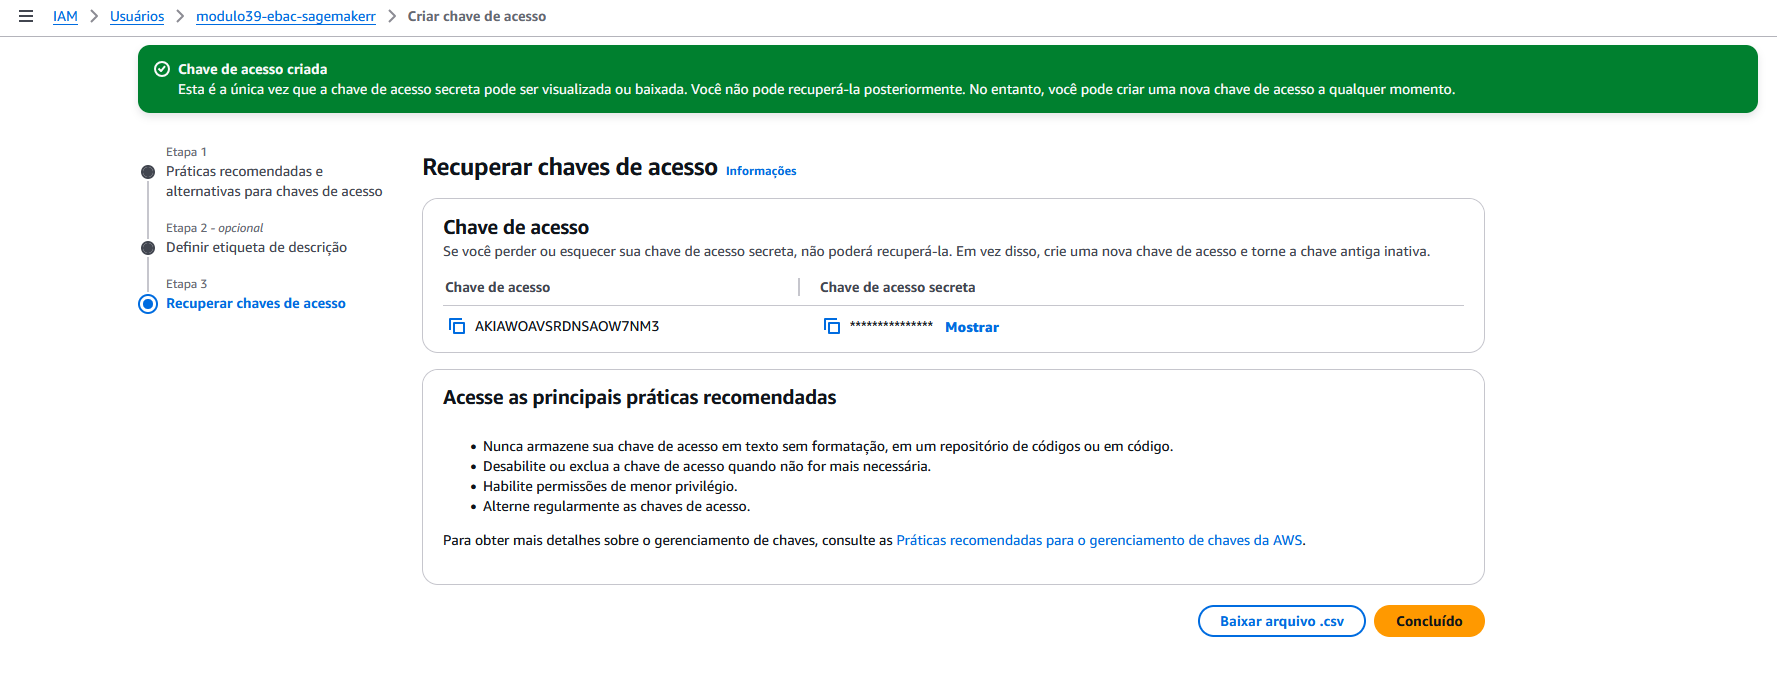

**Parte 2:**Preparando o ambiente do google colab para utilizar essas chaves.

 - Instalar o `boto3`

In [ ]:
!pip install boto3

- Configurando as credenciais de acesso.

In [ ]:
from getpass import getpass

aws_access_key_id = getpass()

··········


In [ ]:
from getpass import getpass

aws_secret_access_key = getpass()

··········


In [ ]:
import boto3
import pandas as pd

client = boto3.client('s3', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [ ]:
BUCKET = 'modulo39-ebac-sagemakerr'

client.download_file(BUCKET, 'cotacao.csv', 'cotacao_aws.csv')

- Extraindo para visualizar estrutura de  dados

In [ ]:
df = pd.read_csv('cotacao_aws.csv')
df.head()

,date,usd,eur,gbp
0,2021-01-21,5.4582,6.1896,7.3980
1,2021-01-20,5.4191,6.1290,7.3673
2,2021-01-19,5.4383,6.1676,7.3994
3,2021-01-18,5.5666,6.3042,7.5672


** - Realizando teste de Carregar arquivo no AWS e esperado obter falha/ERRO porque a permissão gerada é apenas de leitura e download de arquivo não contemplando upload.**

In [ ]:
client.upload_file(Filename='cotacao_aws.csv', Bucket=BUCKET, Key='cotacao_aws.csv')

S3UploadFailedError: Failed to upload cotacao_aws.csv to modulo39-ebac-sagemakerr/cotacao_aws.csv: An error occurred (AccessDenied) when calling the PutObject operation: User: arn:aws:iam::442426886363:user/modulo39-ebac-sagemakerr is not authorized to perform: s3:PutObject on resource: "arn:aws:s3:::modulo39-ebac-sagemakerr/cotacao_aws.csv" because no identity-based policy allows the s3:PutObject action